In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.datasets import load_digits
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('~/Downloads/Online Payment Fraud Detection Dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# About Dataset

Column References: 

0. step: represents a unit of time where 1 step equals 1 hour
1. type: type of online transaction
2. amount: the amount of the transaction
3. nameOrig: customer starting the transaction
4. oldbalanceOrg: balance before the transaction
5. newbalanceOrig: balance after the transaction
6. nameDest: recipient of the transaction
7. oldbalanceDest: initial balance of recipient before the transaction
8. newbalanceDest: the new balance of recipient after the transaction
9. isFraud: fraud transaction
10. isFlaggedFraud: fraud transaction flagged

In [4]:
#I found my laptop do not have enough computation power and slowed down so much during analysis, 
#so I decided to reduce to one-fourth of total rows in this dataset

df_reduced = df.sample(frac=0.25, random_state=42)

In [5]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1590655 entries, 3737323 to 2105206
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1590655 non-null  int64  
 1   type            1590655 non-null  object 
 2   amount          1590655 non-null  float64
 3   nameOrig        1590655 non-null  object 
 4   oldbalanceOrg   1590655 non-null  float64
 5   newbalanceOrig  1590655 non-null  float64
 6   nameDest        1590655 non-null  object 
 7   oldbalanceDest  1590655 non-null  float64
 8   newbalanceDest  1590655 non-null  float64
 9   isFraud         1590655 non-null  int64  
 10  isFlaggedFraud  1590655 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 145.6+ MB


In [6]:
df_reduced.tail()

step      type     amount     nameOrig  oldbalanceOrg  \
6314940   687  CASH_OUT  475157.93  C2095939918           0.00   
3201101   249  CASH_OUT    9996.99  C1202002991           0.00   
4855636   347  CASH_OUT  119104.46   C780309485       20841.00   
3469430   258   CASH_IN  283825.76  C1022144759     6119799.78   
2105206   183   PAYMENT   16123.09   C810183286           0.00   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6314940            0.00   C462396162       492517.65       967675.57        0   
3201101            0.00  C1518827257       199100.82       209097.81        0   
4855636            0.00  C1456654961       318715.04       437819.49        0   
3469430      6403625.54  C1207048065       584705.19       209106.00        0   
2105206            0.00   M121272411            0.00            0.00        0   

         isFlaggedFraud  
6314940               0  
3201101               0  
4855636               0  
3469430               0  
2105206               0

In [7]:
df_reduced.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  1.590655e+06  1.590655e+06   1.590655e+06    1.590655e+06   
mean   2.434319e+02  1.798852e+05   8.345925e+05    8.560225e+05   
std    1.423576e+02  6.049865e+05   2.892015e+06    2.928235e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.336290e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.486465e+04   1.431848e+04    0.000000e+00   
75%    3.350000e+02  2.088720e+05   1.073760e+05    1.447969e+05   
max    7.420000e+02  6.933732e+07   4.489219e+07    3.894623e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    1.590655e+06    1.590655e+06  1.590655e+06    1.590655e+06  
mean     1.102786e+06    1.227006e+06  1.285634e-03    3.772031e-06  
std      3.391198e+06    3.660434e+06  3.583269e-02    1.942169e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327225e+05    2.150403e+05  0.000000e+00    0.000000e+00  
75%      9.459114e+05    1.114241e+06  0.000000e+00    0.000000e+00  
max      3.553814e+08    3.560159e+08  1.000000e+00    1.000000e+00

In [8]:
#To find if any data is missing on each column
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [10]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install pydantic==2.7.0 ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [12]:
# from pydantic import BaseSettings # OLD
from pydantic_settings import BaseSettings # NEW

In [13]:
from ydata_profiling import ProfileReport

In [14]:
profile = ProfileReport(df_reduced, title = "Online Payment Fraud Detection Exploratory Data Analysis")

In [15]:
dir(profile)

['_ProfileReport__initialize_dataframe',
 '_ProfileReport__validate_inputs',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_description_set',
 '_df_hash',
 '_html',
 '_json',
 '_render_html',
 '_render_json',
 '_render_widgets',
 '_report',
 '_repr_html_',
 '_sample',
 '_summarizer',
 '_type_schema',
 '_typeset',
 '_widgets',
 'compare',
 'config',
 'description_set',
 'df',
 'df_hash',
 'dump',
 'dumps',
 'get_description',
 'get_duplicates',
 'get_rejected_variables',
 'get_sample',
 'html',
 'invalidate_cache',
 'json',
 'load',
 'loads',
 'report',
 'summarizer',
 'to_expectation_suite',
 'to_file',
 'to_html',
 'to_json',
 'to_notebook_ifram

In [16]:
pip install --upgrade pillow

Note: you may need to restart the kernel to use updated packages.


In [17]:
config = {"plot": {"font_path": "/Library/Fonts/Keyboard.ttf"}}

In [18]:
profile = ProfileReport(df_reduced)

In [19]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
# check labels in "type" feature
df_reduced['type'].unique()

array(['CASH_IN', 'PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT'],
      dtype=object)

In [21]:
df_reduced['type'].value_counts()

CASH_OUT    558624
PAYMENT     538335
CASH_IN     350113
TRANSFER    133241
DEBIT        10342
Name: type, dtype: int64

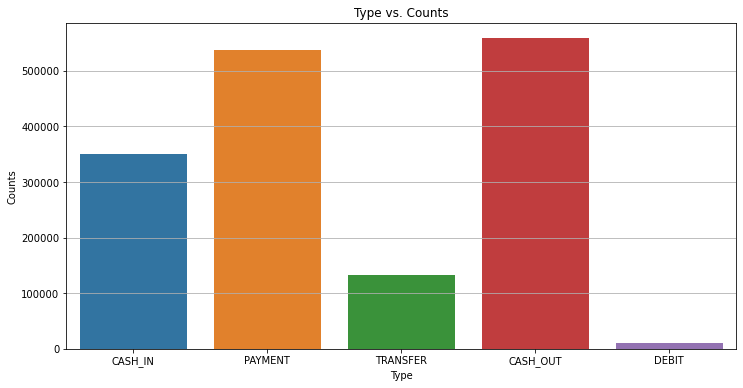

In [22]:
plt.figure(figsize=(12,6))
plt.title("Type vs. Counts")
sns.countplot(data=df_reduced, x='type')
plt.xlabel("Type")
plt.ylabel("Counts")
plt.grid(axis='y', alpha=1)
plt.show()

In [23]:
# Explore the correlation between type vs. isFraud. Convert the `type` column to numerical values 
#using one-hot encoding
df_reduced['type_encoded'] = df_reduced['type'].astype('category').cat.codes

In [24]:
# Calculate the correlation matrix
correlation_matrix = df_reduced[['type_encoded', 'isFraud']].corr()

In [25]:
# Display the correlation between type_encoded and isFraud
print("Correlation between transaction type and fraud:")
print(correlation_matrix)

Correlation between transaction type and fraud:
              type_encoded   isFraud
type_encoded      1.000000  0.020849
isFraud           0.020849  1.000000


In [26]:
#Calculates the average value of isFraud (which represents the fraud rate) for each transaction type. 
#A higher mean indicates a higher likelihood of fraud.
fraud_rate_by_type = df_reduced.groupby('type')['isFraud'].mean()

In [27]:
# Display fraud rates for each transaction type
print("Fraud rate by transaction type:")
print(fraud_rate_by_type)

Fraud rate by transaction type:
type
CASH_IN     0.000000
CASH_OUT    0.001831
DEBIT       0.000000
PAYMENT     0.000000
TRANSFER    0.007670
Name: isFraud, dtype: float64


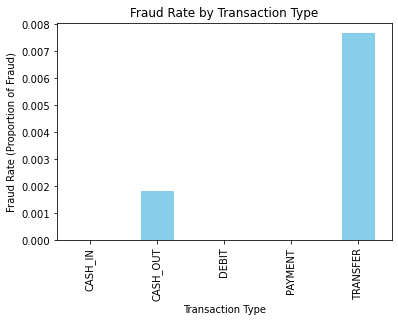

In [28]:
# Visualize the fraud rate by type
fraud_rate_by_type.plot(kind='bar', color='skyblue')
plt.title('Fraud Rate by Transaction Type')
plt.ylabel('Fraud Rate (Proportion of Fraud)')
plt.xlabel('Transaction Type')
plt.show()

## Out of all five different types of transactions, TRANSFER has the highest fraud rate, and CASH_OUT is the second highest. The other three types have zero incidents of fraud. 

## Dropping features that are not relevant for modeling since these are only account numbers:

In [29]:
df_reduced.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

## Based on the correlation in the heatmap, 'step' and 'isFlaggedFraud' can be dropped

In [30]:
df_reduced.drop(['step', 'isFlaggedFraud'], axis=1, inplace=True)

In [31]:
df_reduced.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_encoded'],
      dtype='object')

## Dropped 'type' since this is categorial feature and I already create another column 'type_encoded' using one-hot encoder

In [32]:
df_reduced.drop(['type'], axis=1, inplace=True)

In [33]:
# Drop the label column 'y' and maintain all other columns

X = df_reduced.drop(columns='isFraud')
y = df_reduced['isFraud']

In [34]:
df_reduced

amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
3737323   330218.42       20866.00       351084.42       452419.57   
264914     11647.08       30370.00        18722.92            0.00   
85647     152264.21      106589.00       258853.21       201303.01   
5899326  1551760.63           0.00            0.00      3198359.45   
2544263    78172.30     2921331.58      2999503.88       415821.90   
...             ...            ...             ...             ...   
6314940   475157.93           0.00            0.00       492517.65   
3201101     9996.99           0.00            0.00       199100.82   
4855636   119104.46       20841.00            0.00       318715.04   
3469430   283825.76     6119799.78      6403625.54       584705.19   
2105206    16123.09           0.00            0.00            0.00   

         newbalanceDest  isFraud  type_encoded  
3737323       122201.15        0             0  
264914             0.00        0             3  
85647          49038.80        0             0  
5899326      4750120.08        0             4  
2544263       337649.60        0             0  
...                 ...      ...           ...  
6314940       967675.57        0             1  
3201101       209097.81        0             1  
4855636       437819.49        0             1  
3469430       209106.00        0             0  
2105206            0.00        0             3  

[1590655 rows x 7 columns]

## Feature Engineering and Train/Test Split

In [35]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Define column transformer for handling different types of encodings
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['type_encoded']), 
                                     remainder = StandardScaler())

In [36]:
from sklearn.model_selection import train_test_split
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [37]:
from sklearn.pipeline import Pipeline
# Create a pipeline with the transformer and and the classifier 'Logistic Regression'
from sklearn.linear_model import LogisticRegression
logregressionpipe = Pipeline([
    ('transform', transformer),
    ('classifier', LogisticRegression(max_iter=1000))
])
logregressionpipe.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['type_encoded'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [38]:
#Calculate and print the training accuracy
logregressionpipe_acc_train = logregressionpipe.score(X_train, y_train)
logregressionpipe_acc_test = logregressionpipe.score(X_test, y_test)

In [39]:
print(f"Training Accuracy: {logregressionpipe_acc_train:.4f}")
print(f"Testing Accuracy: {logregressionpipe_acc_test:.4f}")

Training Accuracy: 0.9991
Testing Accuracy: 0.9992


In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import time

In [41]:
# Define the models to test (with baseline parameters)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
}

In [42]:
# Initialize a dictionary to store the accuracy results
model_performance = {}

In [43]:
# Fit and evaluate each model, and create a pipeline with the transformer and and the classifiers
for model_name, model in models.items():
    print(f"Processing model: {model_name}")
    
    pipe = Pipeline([
    ('transform', transformer),
    ('models', model)
    ])
    
    # Track the start time for training
    start_time = time.time()
    
    # Fit the pipeline
    pipe.fit(X_train, y_train)
    
    # Calculate training time
    train_time = time.time() - start_time
    
    # Calculate train accuracy
    train_accuracy = accuracy_score(y_train, pipe.predict(X_train))
    
    # Evaluate the model on the test data (test accuracy)
    test_accuracy = accuracy_score(y_test, pipe.predict(X_test))
    
    # Store the results in the dictionary
    model_performance[model_name] = {
        'Train Time (s)': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    }
    
    # Print the results for each model after processing
    print(f"{model_name} - Train Time: {train_time:.4f} seconds, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

Processing model: Logistic Regression
Logistic Regression - Train Time: 3.5172 seconds, Train Accuracy: 0.9991, Test Accuracy: 0.9992
Processing model: Decision Tree
Decision Tree - Train Time: 4.5756 seconds, Train Accuracy: 1.0000, Test Accuracy: 0.9996


In [44]:
import pandas as pd
performance_df = pd.DataFrame(model_performance).T

In [45]:
# Rename the columns to match the desired output format
performance_df.columns = ['Train Time (s)', 'Train Accuracy', 'Test Accuracy']

# Display the DataFrame
print(performance_df)

                     Train Time (s)  Train Accuracy  Test Accuracy
Logistic Regression        3.517197        0.999141       0.999170
Decision Tree              4.575602        1.000000       0.999625


## Based on the result, both models performed well with very close test accuracy. Decision Tree yield slightly better accuracy, however, I would choose Logistic Regression over Decision Tree if train time is a main factor of how efficient a model could run. 